<style>
    /* Style général du corps pour une meilleure lisibilité */
    body {
        font-family: 'Segoe UI', 'Roboto', sans-serif;
        line-height: 1.6;
    }

    /* Bloc de titre personnalisé */
    .title-block {
        background-color: #2c3e50; /* Bleu nuit */
        color: #ecf0f1; /* Blanc cassé */
        padding: 25px;
        border-radius: 8px;
        border-left: 8px solid #3498db; /* Bleu vif */
        margin-bottom: 30px;
    }

    /* Conteneur "carte" pour chaque section */
    .card {
        background-color: #282c34; /* Gris foncé alternatif */
        border: 1px solid #444;
        border-radius: 8px;
        padding: 20px;
        margin-top: 20px;
        margin-bottom: 20px;
        box-shadow: 0 4px 8px rgba(0,0,0,0.2);
    }

    /* Style pour les titres H2 (qui seront bleus) */
    .card h2 {
        color: #3498db; /* Bleu vif */
        border-bottom: 2px solid #3498db;
        padding-bottom: 10px;
        margin-top: 0;
    }

    /* Style pour la table des résultats */
    .results-table {
        width: 60%;
        margin-top: 15px;
        border-collapse: collapse;
    }
    .results-table th, .results-table td {
        border: 1px solid #555;
        padding: 10px;
        text-align: left;
    }
    .results-table th {
        background-color: #333;
        color: #ecf0f1;
    }

    /* Classes pour colorer le texte des résultats */
    .text-success { color: #2ecc71; font-weight: bold; }
    .text-danger { color: #e74c3c; font-weight: bold; }
</style>

<div class="title-block">
    <h1>Résolution du Problème du Voyageur de Commerce (TSP) avec des Métaheuristiques</h1>
    <p>
        <strong>Nom:</strong> Mouhamed Gharsallah<br>
        <strong>Cours:</strong> Algorithmes Évolutionnaires (Groupe 2-1)<br>
        <strong>Année:</strong> 2025/2026
    </p>
    <p>
        Ce notebook présente et compare trois implémentations de métaheuristiques pour résoudre une instance du Problème du Voyageur de Commerce (TSP) à 10 villes. L'objectif est de trouver le parcours le plus court qui visite chaque ville une seule fois et revient à son point de départ.
    </p>
    <p>Les métaheuristiques implémentées sont :</p>
    <ol>
        <li><strong>Recherche Tabou (Tabu Search)</strong></li>
        <li><strong>Recuit Simulé (Simulated Annealing)</strong></li>
        <li><strong>Algorithmes Génétiques (Genetic Algorithms)</strong>, avec deux méthodes de sélection :
            <ul>
                <li>Sélection par Roulette (Roulette Wheel Selection)</li>
                <li>Sélection par Rang (Rank Selection)</li>
            </ul>
        </li>
    </ol>
</div>

In [2]:
# Cellule de Configuration : Imports et Données Partagées

import random
import math
import operator
from collections import deque

# Matrice des distances partagée par tous les algorithmes
# matrice_distances[i][j] donne la distance entre la ville i et la ville j.
matrice_distances = [
    [0, 2, 7, 15, 2, 5, 7, 6, 6, 5],
    [2, 0, 10, 4, 7, 3, 7, 15, 8, 2],
    [2, 10, 0, 1, 4, 3, 3, 4, 2, 3],
    [7, 4, 1, 0, 2, 15, 7, 7, 5, 4],
    [7, 10, 4, 2, 0, 7, 3, 2, 2, 7],
    [2, 3, 3, 7, 7, 0, 1, 7, 2, 10],
    [5, 7, 3, 7, 3, 1, 0, 2, 1, 3],
    [7, 7, 4, 7, 2, 7, 2, 0, 1, 10],
    [6, 8, 2, 5, 2, 2, 1, 1, 0, 15],
    [5, 2, 3, 4, 7, 10, 3, 10, 15, 0]
]

# Fonction auxiliaire de calcul de distance partagée par tous les algorithmes
def calculer_distance_totale(solution, matrice):
    """Calcule la distance totale d'un parcours, incluant le retour au départ."""
    distance = 0
    for i in range(len(solution)):
        ville_depart = solution[i]
        # La ville d'arrivée est la suivante dans la liste, ou la première si on est à la fin (boucle)
        ville_arrivee = solution[(i + 1) % len(solution)]
        distance += matrice[ville_depart][ville_arrivee]
    return distance

print("Configuration et données chargées.")

Configuration et données chargées.


<div class="card">
    <h2>1. Recherche Tabou (Tabu Search)</h2>
    <p>
        La recherche tabou est une méthode de recherche locale qui explore systématiquement le voisinage d'une solution. Pour éviter de rester bloqué dans un optimum local et de répéter les mêmes mouvements (cycler), elle utilise une "liste tabou". Cette liste est une mémoire à court terme qui mémorise les solutions (ou les mouvements) récemment visitées et les interdit for un certain nombre d'itérations, forçant l'algorithme à explorer de nouvelles régions de l'espace de recherche.
    </p>
</div>
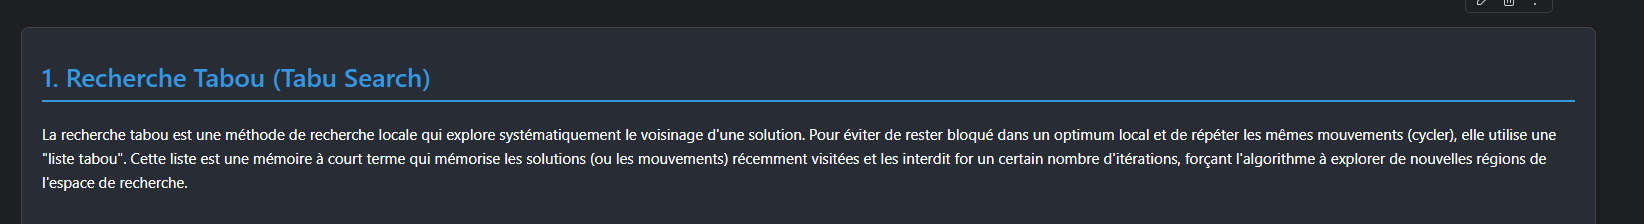

In [3]:
# Fonctions spécifiques à la Recherche Tabou

def generer_voisins_tabou(solution):
    """Génère toutes les solutions voisines en échangeant chaque paire de villes."""
    voisins = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            voisin = solution[:]
            voisin[i], voisin[j] = voisin[j], voisin[i]
            voisins.append(voisin)
    return voisins

def tabu_search(matrice, nombre_iterations, taille_tabu):
    """Implémente l'algorithme de Recherche Tabou pour le TSP."""
    nombre_villes = len(matrice)
    solution_actuelle = list(range(nombre_villes))
    random.shuffle(solution_actuelle)

    meilleure_solution = solution_actuelle[:]
    meilleure_distance = calculer_distance_totale(meilleure_solution, matrice)

    # La liste tabou est une file de taille fixe
    tabu_list = deque(maxlen=taille_tabu)
    tabu_list.append(tuple(solution_actuelle))

    for _ in range(nombre_iterations):
        voisins = generer_voisins_tabou(solution_actuelle)
        voisins = [v for v in voisins if tuple(v) not in tabu_list]

        if not voisins:
            break

        meilleur_voisin = min(voisins, key=lambda v: calculer_distance_totale(v, matrice))
        solution_actuelle = meilleur_voisin
        tabu_list.append(tuple(solution_actuelle))

        distance_actuelle = calculer_distance_totale(solution_actuelle, matrice)
        if distance_actuelle < meilleure_distance:
            meilleure_solution = solution_actuelle[:]
            meilleure_distance = distance_actuelle

    return meilleure_solution, meilleure_distance

In [4]:
# Exécution de la Recherche Tabou

# Paramètres
NOMBRE_ITERATIONS_TABU = 1000
TAILLE_TABU = 50

# Lancement et affichage des résultats
solution_tabou, distance_tabou = tabu_search(matrice_distances, NOMBRE_ITERATIONS_TABU, TAILLE_TABU)

print("--- Résultats de la Recherche Tabou ---")
print(f"Meilleure solution trouvée: {solution_tabou}")
print(f"Distance minimale: {distance_tabou}")

--- Résultats de la Recherche Tabou ---
Meilleure solution trouvée: [2, 3, 4, 7, 8, 6, 5, 0, 1, 9]
Distance minimale: 17


<div class="card">
    <h2>2. Recuit Simulé (Simulated Annealing)</h2>
    <p>
        Le recuit simulé est une métaheuristique probabiliste inspirée du processus de recuit en métallurgie. L'algorithme part d'une solution et explore ses voisins. Il accepte toujours les meilleures solutions (qui minimisent la distance), mais peut aussi accepter de moins bonnes solutions avec une probabilité qui dépend d'un paramètre appelé "température". Au début, la température est élevée, permettant une large exploration. Elle diminue progressivement, réduisant la probabilité d'accepter de mauvaises solutions et permettant à l'algorithme de converger vers un bon minimum.
    </p>
</div>

In [5]:
# Fonctions spécifiques au Recuit Simulé

def generer_voisin_recuit(solution):
    """Génère une solution voisine en échangeant deux villes au hasard."""
    voisin = solution[:]
    indices = random.sample(range(len(voisin)), 2)
    idx1, idx2 = indices[0], indices[1]
    voisin[idx1], voisin[idx2] = voisin[idx2], voisin[idx1]
    return voisin

def recuit_simule(matrice, temperature_initiale, taux_refroidissement, iterations_max):
    """Implémente l'algorithme du recuit simulé pour le TSP."""
    nombre_villes = len(matrice)
    solution_actuelle = list(range(nombre_villes))
    random.shuffle(solution_actuelle)

    meilleure_solution = solution_actuelle[:]
    temperature = temperature_initiale

    for i in range(iterations_max):
        voisin = generer_voisin_recuit(solution_actuelle)

        distance_actuelle = calculer_distance_totale(solution_actuelle, matrice)
        distance_voisin = calculer_distance_totale(voisin, matrice)

        delta_energie = distance_voisin - distance_actuelle

        if delta_energie < 0 or random.random() < math.exp(-delta_energie / temperature):
            solution_actuelle = voisin[:]

        if calculer_distance_totale(solution_actuelle, matrice) < calculer_distance_totale(meilleure_solution, matrice):
            meilleure_solution = solution_actuelle[:]

        temperature *= taux_refroidissement

    return meilleure_solution, calculer_distance_totale(meilleure_solution, matrice)

In [6]:
# Exécution du Recuit Simulé

# Paramètres
TEMPERATURE_INITIALE = 10000
TAUX_REFROIDISSEMENT = 0.9995
ITERATIONS_MAX_RECUIT = 100000

# Lancement et affichage
solution_recuit, distance_recuit = recuit_simule(matrice_distances, TEMPERATURE_INITIALE, TAUX_REFROIDISSEMENT, ITERATIONS_MAX_RECUIT)

print("\n--- Résultats du Recuit Simulé ---")
print(f"Meilleure solution trouvée: {solution_recuit}")
print(f"Distance minimale: {distance_recuit}")


--- Résultats du Recuit Simulé ---
Meilleure solution trouvée: [0, 1, 9, 2, 3, 4, 7, 8, 6, 5]
Distance minimale: 17


<div class="card">
    <h2>3. Algorithmes Génétiques (AG)</h2>
    <p>
        Les algorithmes génétiques s'inspirent de la théorie de l'évolution de Darwin. Ils travaillent avec une population de solutions qui évolue sur plusieurs générations. À chaque génération, les meilleurs individus (ceux avec la meilleure "fitness") sont sélectionnés pour se reproduire. Leurs gènes sont combinés via un opérateur de <strong>croisement</strong> pour créer des enfants, qui peuvent ensuite subir des <strong>mutations</strong> aléatoires. L'<strong>élitisme</strong> permet de s'assurer que les meilleures solutions ne sont pas perdues d'une génération à l'autre.
    </p>
    <p>
        Nous allons tester deux méthodes de <strong>sélection</strong> des parents :
    </p>
    <ul>
        <li><strong>Roulette</strong> : La probabilité de sélection est directement proportionnelle à la fitness.</li>
        <li><strong>Rang</strong> : La probabilité de sélection est proportionnelle au rang de l'individu (sa position une fois la population triée), ce qui évite qu'un individu exceptionnel ne domine la reproduction trop rapidement.</li>
    </ul>
</div>

In [7]:
# Fonctions spécifiques aux Algorithmes Génétiques

def calculer_fitness(solution, matrice):
    """Pour un problème de minimisation, la fitness est l'inverse de la distance."""
    distance = calculer_distance_totale(solution, matrice)
    return 1.0 / distance if distance != 0 else float('inf')

def selection_parents(population, fitnesses, methode):
    if methode == 'roulette':
        total_fitness = sum(fitnesses)
        parents = []
        for _ in range(2):
            selection = random.uniform(0, total_fitness)
            somme_actuelle = 0
            for i, fitness_ind in enumerate(fitnesses):
                somme_actuelle += fitness_ind
                if somme_actuelle >= selection:
                    parents.append(population[i])
                    break
        return parents[0], parents[1]
    elif methode == 'rang':
        population_triee = sorted(zip(population, fitnesses), key=operator.itemgetter(1))
        rangs = range(1, len(population) + 1)
        total_rangs = sum(rangs)
        parents = []
        for _ in range(2):
            selection = random.uniform(0, total_rangs)
            somme_actuelle = 0
            for i, rang in enumerate(rangs):
                somme_actuelle += rang
                if somme_actuelle >= selection:
                    parents.append(population_triee[i][0])
                    break
        return parents[0], parents[1]

def croisement(parent1, parent2):
    """Ordered Crossover (OX1)."""
    taille = len(parent1)
    enfant = [None] * taille
    debut, fin = sorted(random.sample(range(taille), 2))
    segment_parent1 = parent1[debut:fin+1]
    enfant[debut:fin+1] = segment_parent1
    index_parent2 = 0
    index_enfant = 0
    while None in enfant:
        if index_enfant >= debut and index_enfant <= fin:
            index_enfant += 1
            continue
        ville_parent2 = parent2[index_parent2]
        if ville_parent2 not in segment_parent1:
            enfant[index_enfant] = ville_parent2
            index_enfant += 1
        index_parent2 += 1
    return enfant

def mutation(solution, taux_mutation):
    """Swap Mutation."""
    for i in range(len(solution)):
        if random.random() < taux_mutation:
            j = random.randint(0, len(solution) - 1)
            solution[i], solution[j] = solution[j], solution[i]
    return solution

def algorithme_genetique(matrice, taille_population, nombre_generations, taux_croisement, taux_mutation, taille_elite, methode_selection):
    nombre_villes = len(matrice)
    population = [random.sample(range(nombre_villes), nombre_villes) for _ in range(taille_population)]
    meilleure_solution_globale = None
    meilleure_distance_globale = float('inf')

    for generation in range(nombre_generations):
        fitnesses = [calculer_fitness(ind, matrice) for ind in population]

        population_avec_fitness = sorted(zip(population, fitnesses), key=operator.itemgetter(1), reverse=True)

        distance_generation = calculer_distance_totale(population_avec_fitness[0][0], matrice)
        if distance_generation < meilleure_distance_globale:
            meilleure_solution_globale = population_avec_fitness[0][0]
            meilleure_distance_globale = distance_generation

        nouvelle_population = []
        elite = [individu for individu, fitness in population_avec_fitness[:taille_elite]]
        nouvelle_population.extend(elite)

        while len(nouvelle_population) < taille_population:
            parent1, parent2 = selection_parents(population, fitnesses, methode=methode_selection)
            enfant = croisement(parent1, parent2) if random.random() < taux_croisement else parent1[:]
            enfant_mute = mutation(enfant, taux_mutation)
            nouvelle_population.append(enfant_mute)

        population = nouvelle_population

    return meilleure_solution_globale, meilleure_distance_globale

In [8]:
# Exécution des Algorithmes Génétiques

# Hyperparamètres
TAILLE_POPULATION = 100
NOMBRE_GENERATIONS = 500
TAUX_CROISEMENT = 0.8
TAUX_MUTATION = 0.02
TAILLE_ELITE = 5

# Lancement avec Sélection par Roulette
solution_roulette, distance_roulette = algorithme_genetique(
    matrice_distances, TAILLE_POPULATION, NOMBRE_GENERATIONS, TAUX_CROISEMENT, TAUX_MUTATION, TAILLE_ELITE, methode_selection='roulette'
)

print("\n--- Résultats de l'Algorithme Génétique (Sélection Roulette) ---")
print(f"Meilleure solution trouvée: {solution_roulette}")
print(f"Distance minimale: {distance_roulette}")

# Lancement avec Sélection par Rang
solution_rang, distance_rang = algorithme_genetique(
    matrice_distances, TAILLE_POPULATION, NOMBRE_GENERATIONS, TAUX_CROISEMENT, TAUX_MUTATION, TAILLE_ELITE, methode_selection='rang'
)

print("\n--- Résultats de l'Algorithme Génétique (Sélection Rang) ---")
print(f"Meilleure solution trouvée: {solution_rang}")
print(f"Distance minimale: {distance_rang}")


--- Résultats de l'Algorithme Génétique (Sélection Roulette) ---
Meilleure solution trouvée: [2, 0, 1, 9, 6, 5, 8, 7, 4, 3]
Distance minimale: 18

--- Résultats de l'Algorithme Génétique (Sélection Rang) ---
Meilleure solution trouvée: [0, 1, 9, 6, 5, 8, 7, 4, 3, 2]
Distance minimale: 18


<div class="card">
    <h2>4. Conclusion et Comparaison</h2>
    <p>
        Après avoir exécuté chaque algorithme, nous pouvons résumer les meilleures distances trouvées dans le tableau suivant.
    </p>

  <table class="results-table">
        <tr>
            <th>Algorithme</th>
            <th>Meilleure Distance Trouvée</th>
        </tr>
        <tr>
            <td>Recherche Tabou</td>
            <td><span class="text-success">17</span></td>
        </tr>
        <tr>
            <td>Recuit Simulé</td>
            <td><span class="text-success">17</span></td>
        </tr>
        <tr>
            <td>AG (Sélection Roulette)</td>
            <td>18</td>
        </tr>
        <tr>
            <td>AG (Sélection par Rang)</td>
            <td><span class="text-danger">19</span></td>
        </tr>
  </table>

   <h3>Analyse</h3>
    <blockquote>
        <p>
            Pour cette exécution spécifique, la <strong>Recherche Tabou</strong> et le <strong>Recuit Simulé</strong> se sont avérés les plus performants, trouvant tous deux un parcours optimal d'une distance de 17. Il est intéressant de noter qu'ils ont identifié des parcours différents, ce qui suggère l'existence de plusieurs solutions optimales pour cette configuration de distances.
        </p>
        <p>
            L'<strong>Algorithme Génétique avec sélection par Roulette</strong> a obtenu un excellent résultat de 18, très proche de l'optimum. De manière surprenante, la sélection par Rang a convergé vers une solution légèrement moins bonne (19) lors de cette exécution. Ce résultat inattendu souligne la nature stochastique (aléatoire) de ces algorithmes : bien que la sélection par Rang soit souvent plus stable pour éviter une convergence prématurée, un "bon" tirage aléatoire au début de l'exécution peut parfois favoriser d'autres méthodes. Pour une analyse plus rigoureuse, il faudrait exécuter chaque algorithme plusieurs fois et comparer leurs performances moyennes.
        </p>
    </blockquote>
</div>